## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  54.906697  1256.412269  0.669734  3.085696  1.500210
1  30.628215   675.472854  0.945875  5.344975  1.414458
2  49.635201   679.777278  0.970475  6.319462  1.698602
3  12.523163  1670.907861  0.204251  3.862730  1.664816
4  62.746737   745.622747  0.538216  9.752551  1.358014


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.11295 | train_mse: 2.48108 | train_mae: 1.25507 |  0:00:00s
epoch 1  | loss: 0.92634 | train_mse: 2.49187 | train_mae: 1.15153 |  0:00:00s
epoch 2  | loss: 0.58452 | train_mse: 6.60324 | train_mae: 1.69642 |  0:00:00s


epoch 3  | loss: 0.76726 | train_mse: 3.87105 | train_mae: 1.38047 |  0:00:00s
epoch 4  | loss: 0.74012 | train_mse: 2.35145 | train_mae: 1.12511 |  0:00:00s
epoch 5  | loss: 0.53748 | train_mse: 2.47924 | train_mae: 1.05282 |  0:00:00s


epoch 6  | loss: 0.4437  | train_mse: 3.01998 | train_mae: 1.17138 |  0:00:00s
epoch 7  | loss: 0.53369 | train_mse: 2.45262 | train_mae: 1.13612 |  0:00:00s
epoch 8  | loss: 0.37447 | train_mse: 2.23574 | train_mae: 1.14667 |  0:00:00s


epoch 9  | loss: 0.32585 | train_mse: 1.70561 | train_mae: 1.00099 |  0:00:00s
epoch 10 | loss: 0.2551  | train_mse: 1.34288 | train_mae: 0.86973 |  0:00:01s
epoch 11 | loss: 0.29233 | train_mse: 1.37537 | train_mae: 0.85831 |  0:00:01s


epoch 12 | loss: 0.34823 | train_mse: 1.53875 | train_mae: 0.8673  |  0:00:01s
epoch 13 | loss: 0.49068 | train_mse: 1.85991 | train_mae: 0.91855 |  0:00:01s
epoch 14 | loss: 0.2915  | train_mse: 1.66292 | train_mae: 0.83074 |  0:00:01s


epoch 15 | loss: 0.38025 | train_mse: 1.63121 | train_mae: 0.80489 |  0:00:01s
epoch 16 | loss: 0.32215 | train_mse: 1.86805 | train_mae: 0.89607 |  0:00:01s
epoch 17 | loss: 0.2876  | train_mse: 1.46897 | train_mae: 0.85967 |  0:00:01s


epoch 18 | loss: 0.53278 | train_mse: 0.99921 | train_mae: 0.74624 |  0:00:01s
epoch 19 | loss: 0.2994  | train_mse: 0.98159 | train_mae: 0.75429 |  0:00:01s
epoch 20 | loss: 0.24992 | train_mse: 0.91881 | train_mae: 0.71334 |  0:00:01s


epoch 21 | loss: 0.22545 | train_mse: 0.84153 | train_mae: 0.62745 |  0:00:01s
epoch 22 | loss: 0.17921 | train_mse: 0.65645 | train_mae: 0.57638 |  0:00:02s
epoch 23 | loss: 0.37983 | train_mse: 0.42307 | train_mae: 0.48309 |  0:00:02s


epoch 24 | loss: 0.26402 | train_mse: 0.41041 | train_mae: 0.47466 |  0:00:02s
epoch 25 | loss: 0.20649 | train_mse: 0.26998 | train_mae: 0.39889 |  0:00:02s
epoch 26 | loss: 0.30311 | train_mse: 0.28289 | train_mae: 0.39172 |  0:00:02s


epoch 27 | loss: 0.25351 | train_mse: 0.28378 | train_mae: 0.38465 |  0:00:02s
epoch 28 | loss: 0.19187 | train_mse: 0.30883 | train_mae: 0.40027 |  0:00:02s
epoch 29 | loss: 0.20844 | train_mse: 0.26449 | train_mae: 0.36702 |  0:00:02s


epoch 30 | loss: 0.33116 | train_mse: 0.17457 | train_mae: 0.31339 |  0:00:02s
epoch 31 | loss: 0.34109 | train_mse: 0.16646 | train_mae: 0.3161  |  0:00:02s
epoch 32 | loss: 0.23876 | train_mse: 0.18407 | train_mae: 0.33356 |  0:00:02s


epoch 33 | loss: 0.18843 | train_mse: 0.19408 | train_mae: 0.3286  |  0:00:03s
epoch 34 | loss: 0.22933 | train_mse: 0.28858 | train_mae: 0.38199 |  0:00:03s


epoch 35 | loss: 0.31945 | train_mse: 0.24354 | train_mae: 0.34587 |  0:00:03s
epoch 36 | loss: 0.21407 | train_mse: 0.18296 | train_mae: 0.29695 |  0:00:03s
epoch 37 | loss: 0.35672 | train_mse: 0.20675 | train_mae: 0.33348 |  0:00:03s


epoch 38 | loss: 0.19056 | train_mse: 0.17652 | train_mae: 0.30422 |  0:00:03s
epoch 39 | loss: 0.24919 | train_mse: 0.17509 | train_mae: 0.31338 |  0:00:03s


epoch 40 | loss: 0.15999 | train_mse: 0.20583 | train_mae: 0.32752 |  0:00:03s
epoch 41 | loss: 0.27744 | train_mse: 0.23743 | train_mae: 0.36111 |  0:00:03s


epoch 42 | loss: 0.26932 | train_mse: 0.24242 | train_mae: 0.35647 |  0:00:04s
epoch 43 | loss: 0.1571  | train_mse: 0.20477 | train_mae: 0.32329 |  0:00:04s
epoch 44 | loss: 0.14562 | train_mse: 0.12922 | train_mae: 0.27679 |  0:00:04s


epoch 45 | loss: 0.24166 | train_mse: 0.0955  | train_mae: 0.24257 |  0:00:04s
epoch 46 | loss: 0.18547 | train_mse: 0.11226 | train_mae: 0.26127 |  0:00:04s
epoch 47 | loss: 0.18377 | train_mse: 0.1108  | train_mae: 0.25476 |  0:00:04s


epoch 48 | loss: 0.08726 | train_mse: 0.11118 | train_mae: 0.24573 |  0:00:04s
epoch 49 | loss: 0.25222 | train_mse: 0.10241 | train_mae: 0.23739 |  0:00:04s
epoch 50 | loss: 0.24649 | train_mse: 0.09236 | train_mae: 0.23302 |  0:00:04s


epoch 51 | loss: 0.15148 | train_mse: 0.10709 | train_mae: 0.25073 |  0:00:04s
epoch 52 | loss: 0.23257 | train_mse: 0.15284 | train_mae: 0.30186 |  0:00:04s
epoch 53 | loss: 0.10849 | train_mse: 0.10898 | train_mae: 0.25032 |  0:00:04s


epoch 54 | loss: 0.16623 | train_mse: 0.09294 | train_mae: 0.23005 |  0:00:05s
epoch 55 | loss: 0.14441 | train_mse: 0.08575 | train_mae: 0.22893 |  0:00:05s
epoch 56 | loss: 0.13368 | train_mse: 0.09123 | train_mae: 0.23385 |  0:00:05s


epoch 57 | loss: 0.12649 | train_mse: 0.09024 | train_mae: 0.23145 |  0:00:05s
epoch 58 | loss: 0.12567 | train_mse: 0.09358 | train_mae: 0.23297 |  0:00:05s
epoch 59 | loss: 0.123   | train_mse: 0.0951  | train_mae: 0.2316  |  0:00:05s


epoch 60 | loss: 0.16924 | train_mse: 0.08458 | train_mae: 0.22425 |  0:00:05s
epoch 61 | loss: 0.3033  | train_mse: 0.14996 | train_mae: 0.28595 |  0:00:05s
epoch 62 | loss: 0.10558 | train_mse: 0.11375 | train_mae: 0.2488  |  0:00:05s


epoch 63 | loss: 0.11044 | train_mse: 0.07149 | train_mae: 0.2003  |  0:00:05s
epoch 64 | loss: 0.15306 | train_mse: 0.05767 | train_mae: 0.18669 |  0:00:05s
epoch 65 | loss: 0.11499 | train_mse: 0.05367 | train_mae: 0.18662 |  0:00:05s


epoch 66 | loss: 0.08789 | train_mse: 0.06032 | train_mae: 0.19524 |  0:00:06s
epoch 67 | loss: 0.14446 | train_mse: 0.06152 | train_mae: 0.19872 |  0:00:06s
epoch 68 | loss: 0.21067 | train_mse: 0.06434 | train_mae: 0.20557 |  0:00:06s


epoch 69 | loss: 0.14239 | train_mse: 0.06319 | train_mae: 0.19616 |  0:00:06s
epoch 70 | loss: 0.0702  | train_mse: 0.04763 | train_mae: 0.17192 |  0:00:06s
epoch 71 | loss: 0.11385 | train_mse: 0.04383 | train_mae: 0.1686  |  0:00:06s


epoch 72 | loss: 0.13881 | train_mse: 0.04588 | train_mae: 0.17417 |  0:00:06s
epoch 73 | loss: 0.14065 | train_mse: 0.067   | train_mae: 0.19779 |  0:00:06s
epoch 74 | loss: 0.09498 | train_mse: 0.07351 | train_mae: 0.20982 |  0:00:06s


epoch 75 | loss: 0.15281 | train_mse: 0.05939 | train_mae: 0.18919 |  0:00:06s
epoch 76 | loss: 0.07993 | train_mse: 0.07409 | train_mae: 0.20652 |  0:00:06s
epoch 77 | loss: 0.19464 | train_mse: 0.117   | train_mae: 0.24877 |  0:00:07s


epoch 78 | loss: 0.09138 | train_mse: 0.11183 | train_mae: 0.24098 |  0:00:07s
epoch 79 | loss: 0.0735  | train_mse: 0.08784 | train_mae: 0.22027 |  0:00:07s
epoch 80 | loss: 0.13223 | train_mse: 0.06901 | train_mae: 0.20375 |  0:00:07s


epoch 81 | loss: 0.07705 | train_mse: 0.10458 | train_mae: 0.22932 |  0:00:07s
epoch 82 | loss: 0.14347 | train_mse: 0.15315 | train_mae: 0.26516 |  0:00:07s
epoch 83 | loss: 0.1284  | train_mse: 0.13339 | train_mae: 0.24783 |  0:00:07s


epoch 84 | loss: 0.18207 | train_mse: 0.13112 | train_mae: 0.256   |  0:00:07s
epoch 85 | loss: 0.13799 | train_mse: 0.0902  | train_mae: 0.21908 |  0:00:07s
epoch 86 | loss: 0.17634 | train_mse: 0.11755 | train_mae: 0.23571 |  0:00:07s


epoch 87 | loss: 0.1693  | train_mse: 0.18767 | train_mae: 0.27865 |  0:00:07s
epoch 88 | loss: 0.08212 | train_mse: 0.17359 | train_mae: 0.27731 |  0:00:07s
epoch 89 | loss: 0.1428  | train_mse: 0.13773 | train_mae: 0.26717 |  0:00:08s


epoch 90 | loss: 0.13471 | train_mse: 0.15898 | train_mae: 0.27894 |  0:00:08s
epoch 91 | loss: 0.13233 | train_mse: 0.13266 | train_mae: 0.26468 |  0:00:08s
epoch 92 | loss: 0.16284 | train_mse: 0.10197 | train_mae: 0.23181 |  0:00:08s


epoch 93 | loss: 0.08791 | train_mse: 0.09561 | train_mae: 0.22084 |  0:00:08s
epoch 94 | loss: 0.11807 | train_mse: 0.09332 | train_mae: 0.22335 |  0:00:08s
epoch 95 | loss: 0.12268 | train_mse: 0.07062 | train_mae: 0.20298 |  0:00:08s


epoch 96 | loss: 0.0927  | train_mse: 0.09064 | train_mae: 0.21837 |  0:00:08s
epoch 97 | loss: 0.10016 | train_mse: 0.16475 | train_mae: 0.25971 |  0:00:08s
epoch 98 | loss: 0.08529 | train_mse: 0.19696 | train_mae: 0.28811 |  0:00:08s


epoch 99 | loss: 0.07379 | train_mse: 0.22433 | train_mae: 0.32383 |  0:00:08s
epoch 100| loss: 0.07788 | train_mse: 0.17472 | train_mae: 0.29381 |  0:00:08s
epoch 101| loss: 0.35399 | train_mse: 0.09748 | train_mae: 0.23311 |  0:00:09s


epoch 102| loss: 0.14335 | train_mse: 0.04855 | train_mae: 0.1744  |  0:00:09s
epoch 103| loss: 0.13721 | train_mse: 0.04482 | train_mae: 0.16153 |  0:00:09s
epoch 104| loss: 0.12322 | train_mse: 0.06567 | train_mae: 0.19065 |  0:00:09s


epoch 105| loss: 0.09949 | train_mse: 0.07711 | train_mae: 0.20772 |  0:00:09s
epoch 106| loss: 0.13827 | train_mse: 0.09054 | train_mae: 0.21758 |  0:00:09s
epoch 107| loss: 0.07433 | train_mse: 0.08701 | train_mae: 0.20835 |  0:00:09s


epoch 108| loss: 0.13998 | train_mse: 0.07936 | train_mae: 0.20029 |  0:00:09s
epoch 109| loss: 0.08941 | train_mse: 0.0887  | train_mae: 0.20884 |  0:00:09s


epoch 110| loss: 0.09272 | train_mse: 0.08942 | train_mae: 0.2096  |  0:00:09s
epoch 111| loss: 0.11029 | train_mse: 0.07528 | train_mae: 0.19398 |  0:00:09s
epoch 112| loss: 0.14541 | train_mse: 0.05404 | train_mae: 0.17311 |  0:00:09s


epoch 113| loss: 0.15629 | train_mse: 0.05134 | train_mae: 0.16962 |  0:00:10s
epoch 114| loss: 0.20398 | train_mse: 0.0546  | train_mae: 0.17574 |  0:00:10s
epoch 115| loss: 0.17677 | train_mse: 0.06176 | train_mae: 0.19178 |  0:00:10s


epoch 116| loss: 0.08777 | train_mse: 0.07228 | train_mae: 0.20107 |  0:00:10s
epoch 117| loss: 0.06376 | train_mse: 0.0939  | train_mae: 0.20894 |  0:00:10s
epoch 118| loss: 0.08131 | train_mse: 0.11715 | train_mae: 0.22709 |  0:00:10s


epoch 119| loss: 0.12247 | train_mse: 0.1578  | train_mae: 0.26258 |  0:00:10s
epoch 120| loss: 0.10186 | train_mse: 0.21937 | train_mae: 0.29812 |  0:00:10s
epoch 121| loss: 0.08603 | train_mse: 0.24049 | train_mae: 0.29372 |  0:00:10s


epoch 122| loss: 0.07556 | train_mse: 0.25454 | train_mae: 0.30574 |  0:00:10s
epoch 123| loss: 0.08006 | train_mse: 0.25064 | train_mae: 0.29332 |  0:00:10s
epoch 124| loss: 0.12747 | train_mse: 0.24782 | train_mae: 0.29247 |  0:00:10s


epoch 125| loss: 0.20175 | train_mse: 0.24252 | train_mae: 0.30608 |  0:00:11s
epoch 126| loss: 0.06667 | train_mse: 0.19241 | train_mae: 0.26359 |  0:00:11s
epoch 127| loss: 0.08841 | train_mse: 0.18325 | train_mae: 0.26045 |  0:00:11s


epoch 128| loss: 0.18983 | train_mse: 0.16758 | train_mae: 0.25518 |  0:00:11s
epoch 129| loss: 0.14819 | train_mse: 0.12064 | train_mae: 0.23347 |  0:00:11s
epoch 130| loss: 0.0977  | train_mse: 0.10795 | train_mae: 0.25447 |  0:00:11s


epoch 131| loss: 0.09651 | train_mse: 0.1109  | train_mae: 0.25851 |  0:00:11s
epoch 132| loss: 0.16221 | train_mse: 0.10348 | train_mae: 0.25403 |  0:00:11s
epoch 133| loss: 0.09387 | train_mse: 0.14659 | train_mae: 0.2902  |  0:00:11s


epoch 134| loss: 0.2014  | train_mse: 0.13268 | train_mae: 0.28045 |  0:00:11s
epoch 135| loss: 0.08578 | train_mse: 0.10808 | train_mae: 0.24999 |  0:00:11s
epoch 136| loss: 0.07537 | train_mse: 0.09518 | train_mae: 0.22783 |  0:00:11s


epoch 137| loss: 0.13251 | train_mse: 0.09167 | train_mae: 0.23083 |  0:00:11s
epoch 138| loss: 0.13338 | train_mse: 0.08466 | train_mae: 0.22395 |  0:00:12s
epoch 139| loss: 0.09094 | train_mse: 0.09001 | train_mae: 0.22569 |  0:00:12s


epoch 140| loss: 0.17027 | train_mse: 0.07969 | train_mae: 0.21706 |  0:00:12s
epoch 141| loss: 0.08474 | train_mse: 0.0786  | train_mae: 0.2145  |  0:00:12s
epoch 142| loss: 0.06442 | train_mse: 0.06475 | train_mae: 0.19905 |  0:00:12s


epoch 143| loss: 0.1084  | train_mse: 0.06179 | train_mae: 0.19023 |  0:00:12s
epoch 144| loss: 0.16022 | train_mse: 0.05531 | train_mae: 0.18315 |  0:00:12s
epoch 145| loss: 0.08022 | train_mse: 0.04672 | train_mae: 0.16803 |  0:00:12s


epoch 146| loss: 0.19856 | train_mse: 0.04827 | train_mae: 0.17421 |  0:00:12s
epoch 147| loss: 0.09098 | train_mse: 0.04916 | train_mae: 0.17035 |  0:00:12s
epoch 148| loss: 0.15621 | train_mse: 0.05939 | train_mae: 0.18329 |  0:00:12s


epoch 149| loss: 0.07686 | train_mse: 0.08413 | train_mae: 0.20697 |  0:00:12s
epoch 150| loss: 0.07656 | train_mse: 0.09401 | train_mae: 0.21892 |  0:00:13s
epoch 151| loss: 0.11963 | train_mse: 0.10767 | train_mae: 0.23829 |  0:00:13s


epoch 152| loss: 0.16594 | train_mse: 0.11661 | train_mae: 0.25401 |  0:00:13s
epoch 153| loss: 0.10517 | train_mse: 0.10339 | train_mae: 0.23931 |  0:00:13s

Early stopping occurred at epoch 153 with best_epoch = 103 and best_train_mae = 0.16153
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

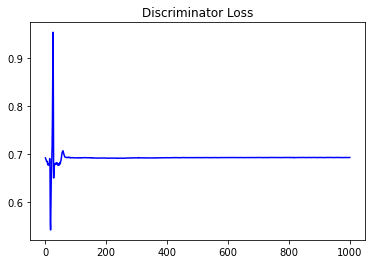

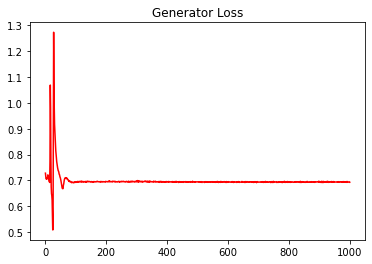

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10584118892296254


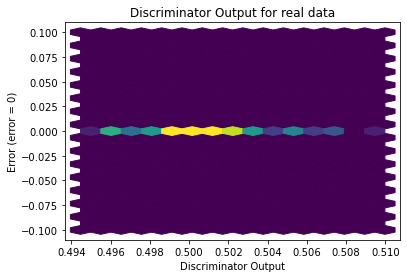

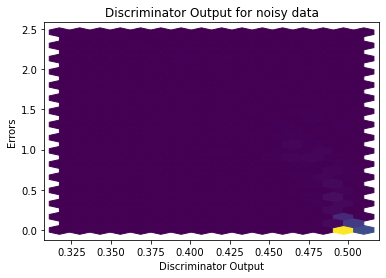

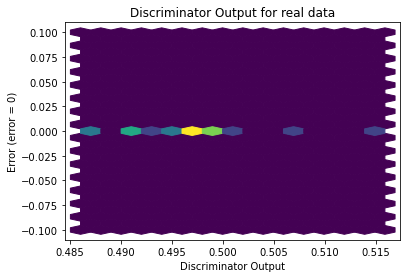

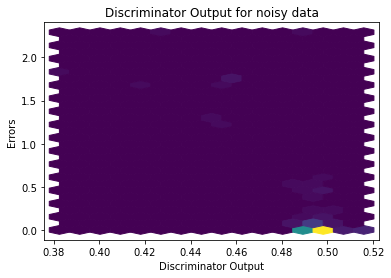

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


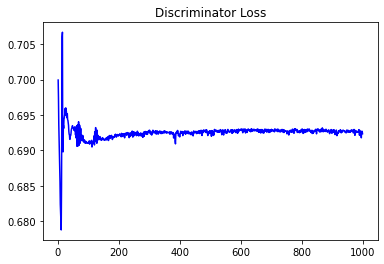

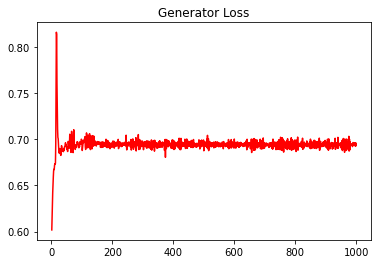

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10347467802908596


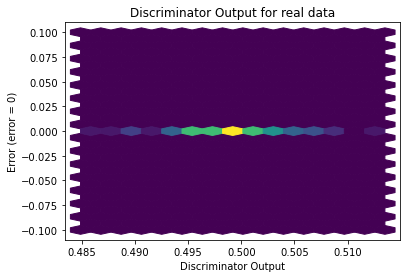

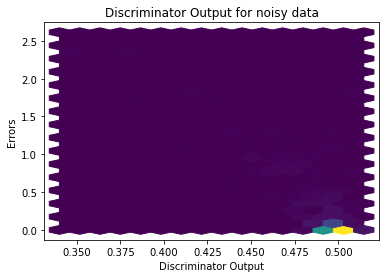

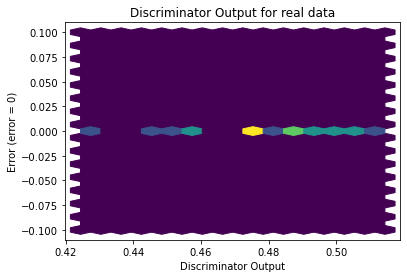

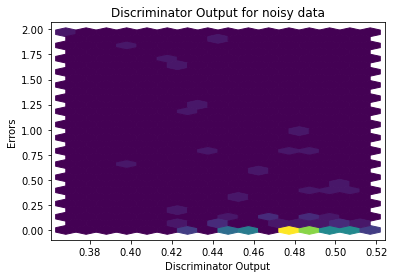

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7411]], requires_grad=True)
